<a href="https://colab.research.google.com/github/ndb796/PyTorch-Object-Detection/blob/main/YOLO_v5_on_Mask_Wearing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* <b>작성자</b>: 나동빈(dongbinna@postech.ac.kr)
* Yolo v5 모델을 Mask Wearing Dataset을 이용해 학습합니다.
* GPU 가속기를 이용하기 위해 <b>[런타임]</b> - <b>[런타임 유형 변경]</b> - <b>[GPU]</b>를 선택합니다.

#### <b>필요한 라이브러리 설치</b>

* YOLO v5 저장소에서 소스코드를 받아 설치를 진행합니다.

In [1]:
!git clone https://github.com/ndb796/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 3014, done.
remote: Total 3014 (delta 0), reused 0 (delta 0), pack-reused 3014
Receiving objects: 100% (3014/3014), 6.66 MiB | 33.58 MiB/s, done.
Resolving deltas: 100% (2001/2001), done.


In [2]:
%cd yolov5
!pip install -r requirements.txt

/content/yolov5
     |████████████████████████████████| 276kB 21.4MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=b9910a761c21eedba183846747a2a769f4ffe0b14f8a774dce12ac81cf24de8c
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


#### <b>Mask Wearing Dataset 불러오기</b>

* Mask Wearing Dataset을 불러와 압축을 해제합니다.

In [3]:
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/Edxo18XdV8dDkYxQxqSjtP8BmsrB9HA6jOT54PwIgwwvow?download=1 -O mask_wearing_db.zip
!unzip mask_wearing_db.zip -d ./data

--2020-11-18 23:03:08--  https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/Edxo18XdV8dDkYxQxqSjtP8BmsrB9HA6jOT54PwIgwwvow?download=1
Resolving postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)... 13.107.136.9
Connecting to postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dongbinna_postech_ac_kr/Documents/Research/datasets/mask_wearing_db.zip?originalPath=aHR0cHM6Ly9wb3N0ZWNoYWNrci1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb25nYmlubmFfcG9zdGVjaF9hY19rci9FZHhvMThYZFY4ZERrWXhReHFTanRQOEJtc3JCOUhBNmpPVDU0UHdJZ3d3dm93P3J0aW1lPVdkVHZIUmFNMkVn [following]
--2020-11-18 23:03:09--  https://postechackr-my.sharepoint.com/personal/dongbinna_postech_ac_kr/Documents/Research/datasets/mask_wearing_db.zip?originalPath=aHR0cHM6Ly9wb3N0ZWNoYWNrci1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb25nYmlubmFfcG9zdGVjaF9hY19rci9FZHhvMThYZFY4ZERrWXhReHFTanR

#### <b>Mask Wearing Dataset으로 모델 학습 및 평가</b>

* 커스텀 데이터셋을 이용해 학습을 진행하므로 <b>환경 설정 파일(mask.yaml)</b>이 필요합니다.
* 개인 저장소에 이 내용을 기록했습니다.

In [6]:
!cat ./mask.yaml

train: data/mask_wearing_db/train/images
val: data/mask_wearing_db/valid/images

nc: 2

names: ['mask', 'no-mask']


In [4]:
!python train.py --data mask.yaml --img-size 416 416 --cfg ./models/yolov5s.yaml --weight yolov5s.pt

Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='mask.yaml', device='', epochs=300, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], local_rank=-1, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/exp', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2020-11-18 23:04:22.301284: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0

* 학습이 완료되었으므로 평가를 진행합니다.

In [8]:
!python test.py --data mask.yaml --img-size 416 --weight runs/train/exp/weights/best.pt

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='mask.yaml', device='', exist_ok=False, img_size=416, iou_thres=0.65, name='exp', project='runs/test', save_conf=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['runs/train/exp/weights/best.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079MB)

Fusing layers... 
Model Summary: 232 layers, 7249215 parameters, 0 gradients
Scanning labels data/mask_wearing_db/valid/labels.cache (29 found, 0 missing, 0 empty, 0 duplicate, for 29 images): 29it [00:00, 10047.48it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 1/1 [00:01<00:00,  1.31s/it]
                 all          29         162       0.525        0.78       0.709       0.437
Speed: 2.7/1.4/4.1 ms inference/NMS/total per 416x416 image at batch-size 32
Results saved to runs/test/exp2


#### <b>부가적인 정보 시각화</b>

* 학습 진행 과정을 시각화 할 수 있습니다.

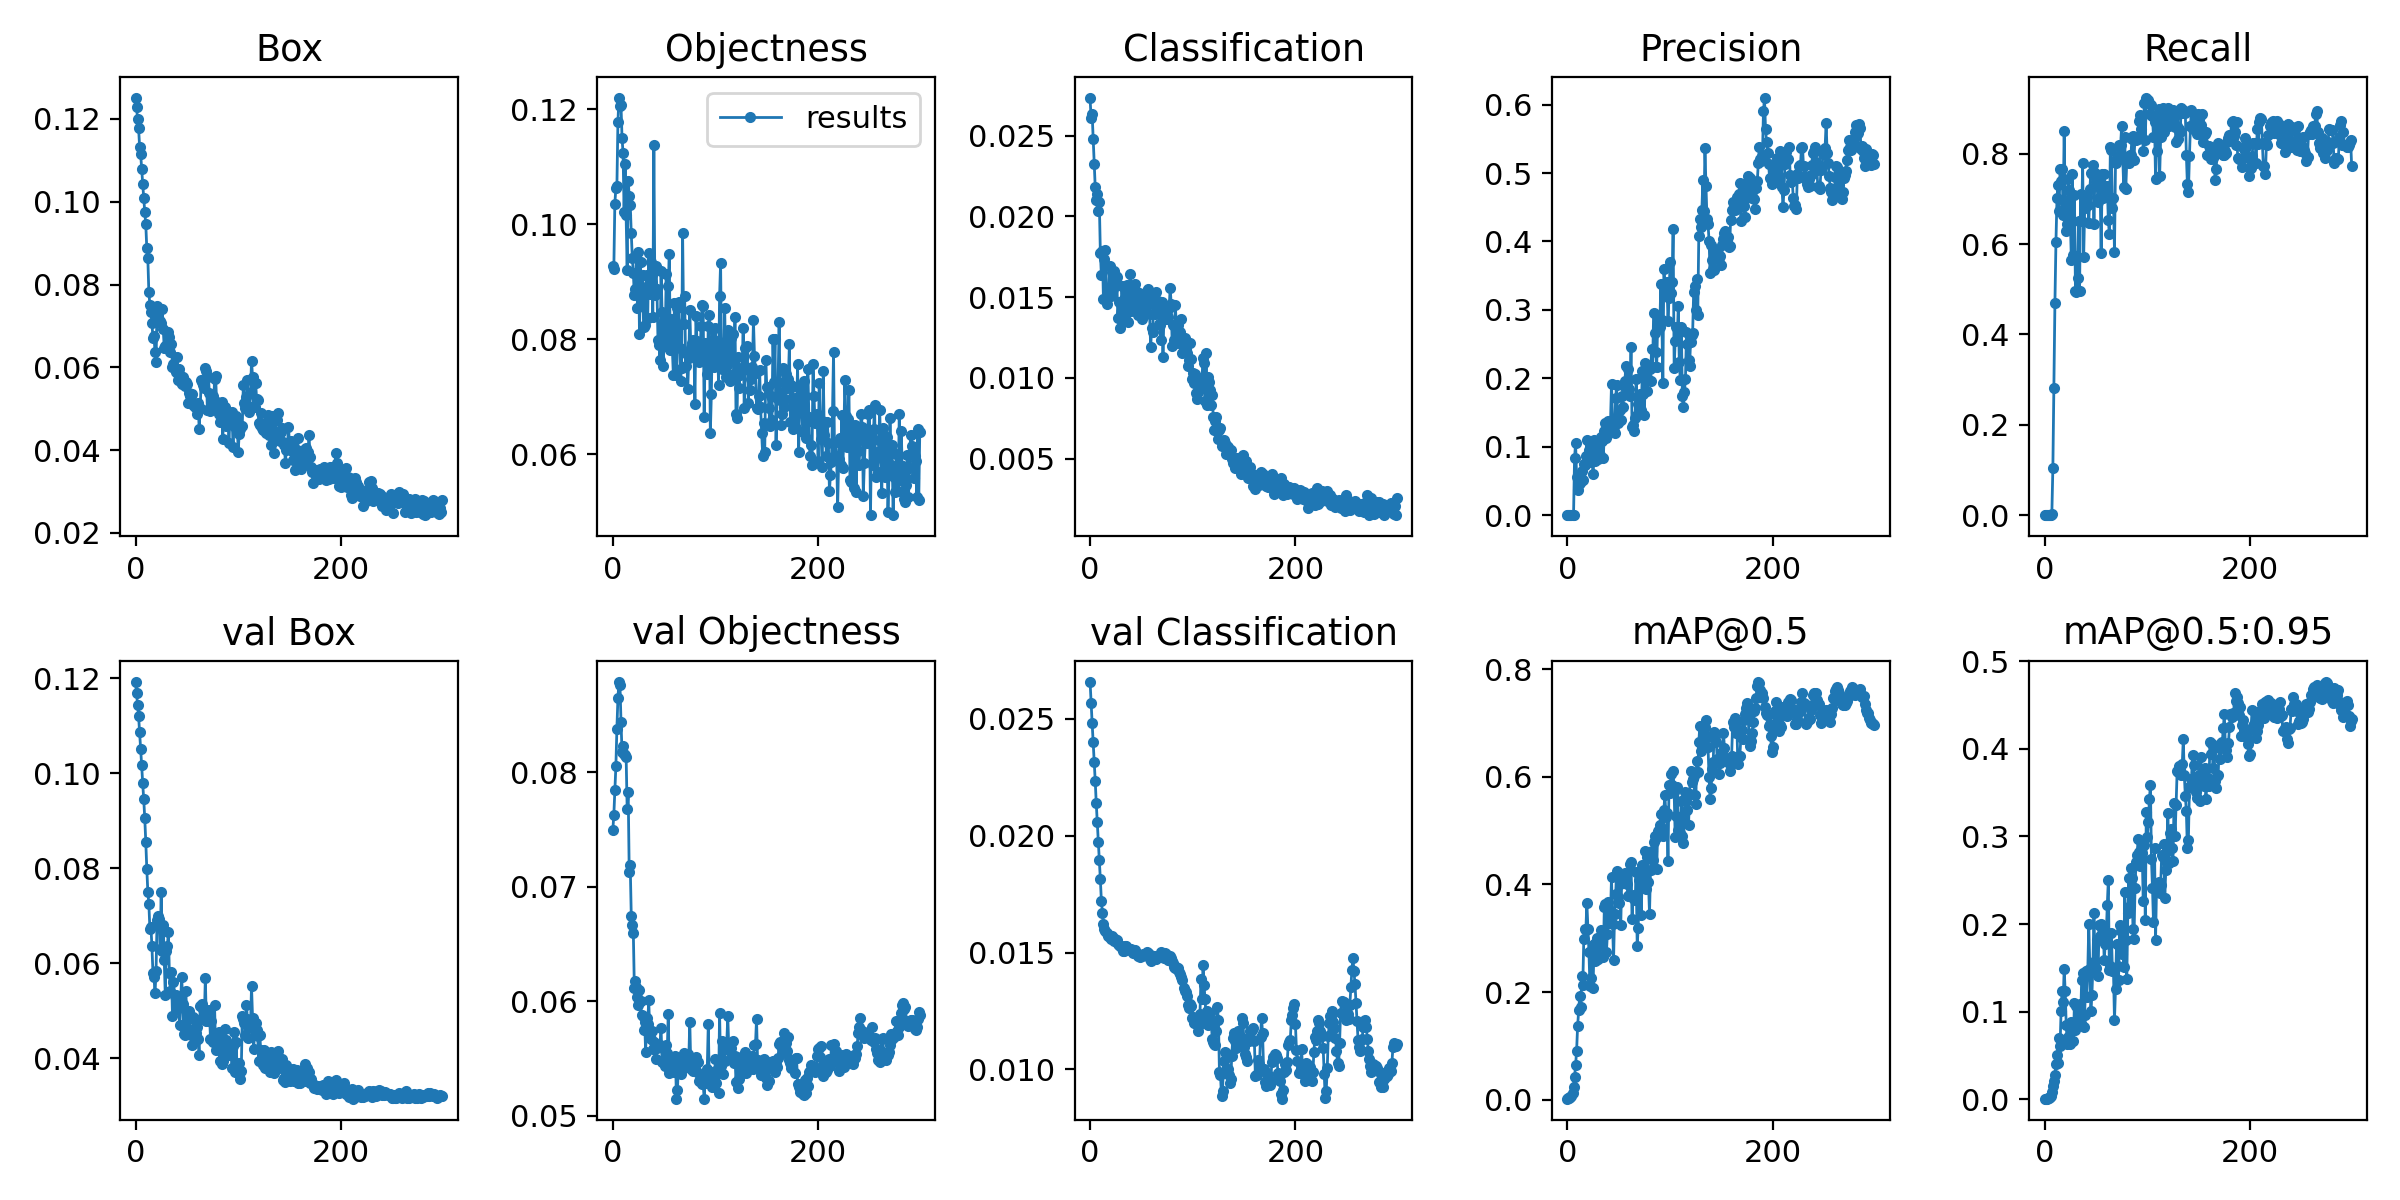

In [13]:
from utils.plots import plot_results
from IPython.display import Image

plot_results(save_dir='runs/train/exp')
Image(filename='runs/train/exp/results.png', width=1080)

#### <b>학습 완료된 모델 파일 저장 및 불러와 테스트</b>

In [14]:
from google.colab import files

files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EcuZ5uleQ9ZNgVYlxTeGsmkBwL6WnD41WgPbzFyOj-Y-KQ?download=1 -O ./yolo_v5_mask_wearing_20201119.pt

--2020-11-18 23:27:36--  https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EcuZ5uleQ9ZNgVYlxTeGsmkBwL6WnD41WgPbzFyOj-Y-KQ?download=1
Resolving postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)... 13.107.136.9
Connecting to postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dongbinna_postech_ac_kr/Documents/Research/models/yolo_v5_mask_wearing_20201119.pt?originalPath=aHR0cHM6Ly9wb3N0ZWNoYWNrci1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb25nYmlubmFfcG9zdGVjaF9hY19rci9FY3VaNXVsZVE5Wk5nVllseFRlR3Nta0J3TDZXbkQ0MVdnUGJ6RnlPai1ZLUtRP3J0aW1lPUI4SGNpQm1NMkVn [following]
--2020-11-18 23:27:37--  https://postechackr-my.sharepoint.com/personal/dongbinna_postech_ac_kr/Documents/Research/models/yolo_v5_mask_wearing_20201119.pt?originalPath=aHR0cHM6Ly9wb3N0ZWNoYWNrci1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb25nYmlubmFfcG9zdGVjaF9hY19rci9FY3VaN

In [18]:
!python test.py --data mask.yaml --img-size 416 --weight yolo_v5_mask_wearing_20201119.pt

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='mask.yaml', device='', exist_ok=False, img_size=416, iou_thres=0.65, name='exp', project='runs/test', save_conf=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['yolo_v5_mask_wearing_20201119.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079MB)

Fusing layers... 
Model Summary: 232 layers, 7249215 parameters, 0 gradients
Scanning labels data/mask_wearing_db/valid/labels.cache (29 found, 0 missing, 0 empty, 0 duplicate, for 29 images): 29it [00:00, 13891.60it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 1/1 [00:01<00:00,  1.33s/it]
                 all          29         162       0.525        0.78       0.709       0.437
Speed: 2.7/3.8/6.5 ms inference/NMS/total per 416x416 image at batch-size 32
Results saved to runs/test/exp3
